In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BASE_PATH = "~/Code/FIM-CGRASP/results/generations/"

In [3]:
Seeds = { 
          10 : [512, 166, 538, 894, 449, 195, 88, 144, 903, 577, 830, 827, 537, 179, 660, 844, 999, 858, 744, 740, 221, 443, 219, 484, 5, 23, 465, 864, 245, 523],
          30 : [449, 144, 830, 179, 999, 740, 219, 23, 245, 588, 746, 967, 275, 389, 561, 775, 250, 121, 152, 696, 691, 836, 51, 371, 881, 594, 362, 511, 416, 372],
          50 : [903, 179, 744, 484, 245, 11, 450, 389, 167, 947, 152, 862, 283, 371, 431, 439, 416, 112, 613, 184, 46, 499, 890, 587, 217, 942, 808, 633, 174, 404],
          100 : [744, 245, 450, 167, 152, 283, 431, 416, 613, 46, 890, 217, 808, 174, 727, 615, 347, 455, 423, 846, 629, 729, 48, 806, 401, 859, 3, 67, 351, 232]
        }

In [4]:
seed = 167

In [5]:
# Parameters:
D = 100
function = 28
seed = Seeds[D][function-1]

In [6]:
print(seed)

67


In [7]:
# LSHADE:
ls_filepath = BASE_PATH + f"LSHADE/D{D}/cec-f{function}/s{seed}/dm-effect.csv"
ls_cost_filepath = BASE_PATH +  f"LSHADE/D{D}/cec-f{function}/s{seed}/pop-costs.csv"

In [8]:
# DM-LSHADE
elite_rate = 0.1
clusters_rate = 0.1498
gen_step = 168
sol_fill_strategy = "rand"
algorithm = "dmlshade"

#f"/home/raphael/Code/FIM-CGRASP/results/generations/LSHADE/D{D}/cec-f{function}/s{seed}/pop-costs.csv"
config = f"--{algorithm} --crossgen --insert --{sol_fill_strategy} --er {elite_rate} --cr {clusters_rate} --gs {gen_step} --sf  --analysis "
dm_filepath = f"/home/raphael/Code/FIM-CGRASP/results/generations/DM_LSHADE/{config}/D{D}/cec-f{function}/s{seed}/dm-effect.csv"
dm_cost_filepath = f"/home/raphael/Code/FIM-CGRASP/results/generations/DM_LSHADE/{config}/D{D}/cec-f{function}/s{seed}/pop-costs.csv"

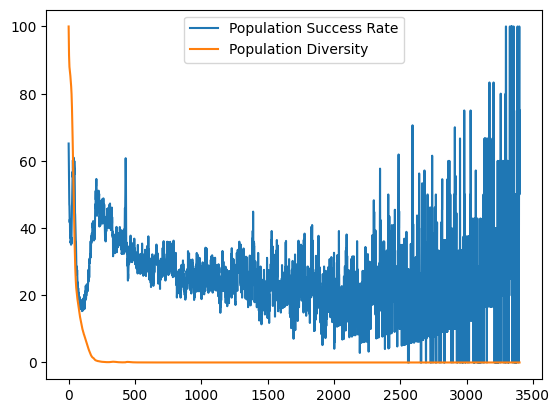

In [9]:
lshade_df = pd.read_csv(ls_filepath, sep=';')

# transformations:
lshade_df.PD /= lshade_df.PD.max()
lshade_df.PD *= 100

lshade_df.PSR /= lshade_df.PSR.max()
lshade_df.PSR *= 100

# visualization:
lshade_df.PSR.plot(label="Population Success Rate")
lshade_df.PD.plot(label="Population Diversity")
plt.legend()

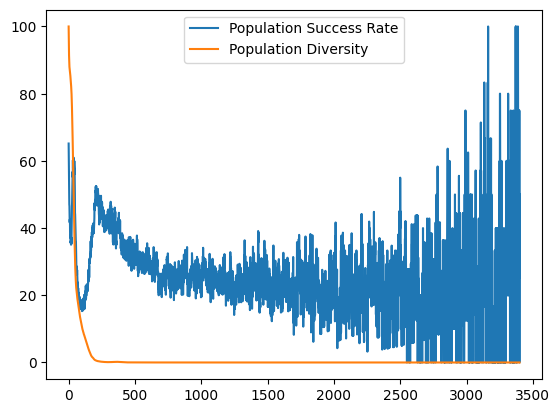

In [10]:
dm_lshade_df = pd.read_csv(dm_filepath, sep=';')

# transformations:
dm_lshade_df.PD /= dm_lshade_df.PD.max()
dm_lshade_df.PD *= 100

dm_lshade_df.PSR /= dm_lshade_df.PSR.max()
dm_lshade_df.PSR *= 100

# visualization:
dm_lshade_df.PSR.plot(label="Population Success Rate")
dm_lshade_df.PD.plot(label="Population Diversity")
plt.legend()

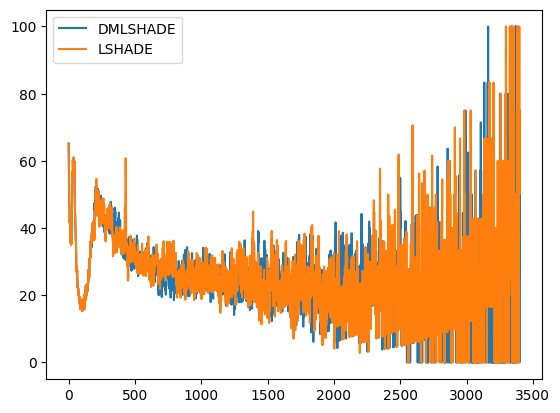

In [148]:
dm_lshade_df.PSR.plot(label="DMLSHADE")
lshade_df.PSR.plot(label="LSHADE")

# gens_count=len(dm_cost_df)
# for dmg in range(70, gens_count, 70): 
#     plt.axvline(x = dmg, color = 'b')
    
plt.legend()

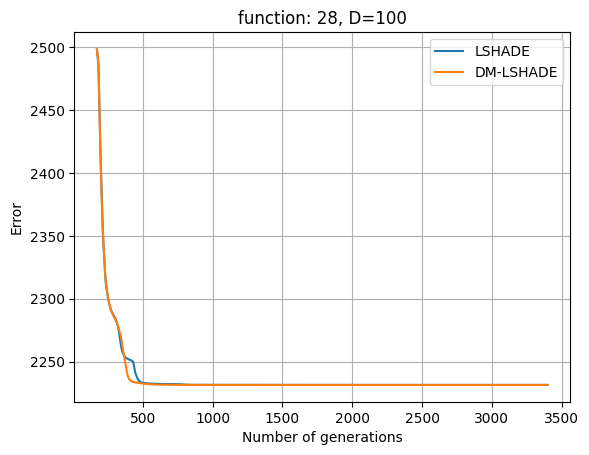

In [153]:
dm_cost_df = pd.read_csv(dm_cost_filepath, sep=';')
lshade_cost_df = pd.read_csv(ls_cost_filepath, sep=';')

lshade_cost_df[lshade_cost_df != -1][lshade_cost_df < 2500].mean(axis=1).plot(label="LSHADE", grid=True)
dm_cost_df[dm_cost_df != -1][dm_cost_df < 2500].mean(axis=1).plot(label="DM-LSHADE", grid=True)

#lshade_cost_df[lshade_cost_df != -1].mean(axis=1).plot(label="LSHADE", grid=True, )
#dm_cost_df[dm_cost_df != -1].mean(axis=1).plot(label="DM-LSHADE", grid=True)

# gens_count=len(dm_cost_df)
# for dmg in range(70, gens_count, 70): 
#     plt.axvline(x = dmg, color = 'b')

plt.title(f"function: {function}, D={D}")
plt.xlabel("Number of generations")
plt.ylabel("Error")
plt.legend()


In [150]:
df = pd.read_csv(dm_filepath, sep=';')

In [46]:
df.PSR /= df.PSR.max()
df.PSR *= 100

df.PD /= df.PD.max()
df.PD *= 100

df.MSR /= df.MSR.max()
df.MSR *= 100

m_df = df.dropna()

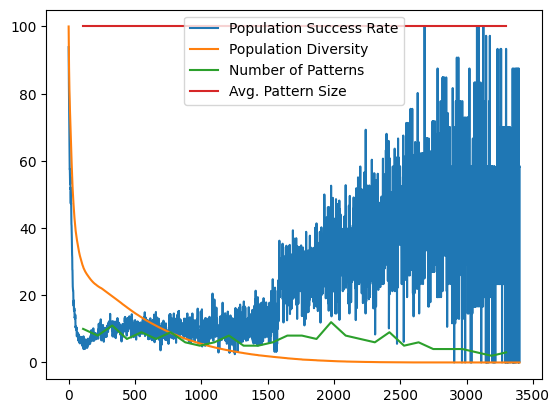

In [14]:
df.PSR.plot(label="Population Success Rate")
df.PD.plot(label="Population Diversity")
m_df.NP[m_df.NP < 30000].plot(label="Number of Patterns")
m_df.APS.plot(label="Avg. Pattern Size")
#m_df.MSR.plot()
#cost_df[cost_df != -1].mean(axis=1).plot(label="Avg. Cost")

# gens_count=len(dm_cost_df)
# for dmg in range(70, gens_count, 70): 
#     plt.axvline(x = dmg, color = 'b')
    
plt.legend()

In [459]:
# Number of Patterns:
print("MIN | MAX | AVG")
print(f"{m_df.NP.min()} | {m_df.NP.max()} | {m_df.NP.mean():.5}")

MIN | MAX | AVG
2.0 | 14.0 | 5.75


In [354]:
# Size of Patterns:
print("MIN | MAX | AVG")
print(f"{m_df.APS.min()} | {m_df.APS.max()} | {m_df.APS.mean():.5}")

MIN | MAX | AVG
10.0 | 10.0 | 10.0


In [355]:
# Population Success Rate:
print("MIN | MAX | AVG")
print(f"{m_df.PSR.min()} | {m_df.PSR.max()} | {m_df.PSR.mean():.5}")

MIN | MAX | AVG
21.770729775609162 | 35.24470315221635 | 26.785


In [356]:
# Patterns Success Rate:
print("MIN | MAX | AVG")
print(f"{m_df.MSR.min()} | {m_df.MSR.max()} | {m_df.MSR.mean():.5}")

MIN | MAX | AVG
100.0 | 100.0 | 100.0
